# Covid-19 Data Visualisation

In this notebook we download a csv file that contains up to date data from here: https://ourworldindata.org/

## Import Required Modules

In [18]:
import numpy as np
import pandas as pd

import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

### Load the Data into a Pandas DataFrame and Explore it
In this step we use the Pandas package to load the data from the https://ourworldindata.org/ website

In [10]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [14]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [15]:
df.isnull().sum()

iso_code                                     0
continent                                 3841
location                                     0
date                                         0
total_cases                               1562
new_cases                                 1564
new_cases_smoothed                        2565
total_deaths                             10961
new_deaths                               10803
new_deaths_smoothed                       2565
total_cases_per_million                   1981
new_cases_per_million                     1983
new_cases_smoothed_per_million            2979
total_deaths_per_million                 11367
new_deaths_per_million                   11209
new_deaths_smoothed_per_million           2979
reproduction_rate                        15364
icu_patients                             70525
icu_patients_per_million                 70525
hosp_patients                            68914
hosp_patients_per_million                68914
weekly_icu_ad

In [16]:
df.min()

iso_code                                         AFG
location                                 Afghanistan
date                                      2020-01-01
total_cases                                        1
new_cases                                     -74347
new_cases_smoothed                             -6223
total_deaths                                       1
new_deaths                                     -1918
new_deaths_smoothed                         -232.143
total_cases_per_million                        0.001
new_cases_per_million                       -2153.44
new_cases_smoothed_per_million              -276.825
total_deaths_per_million                       0.001
new_deaths_per_million                       -76.445
new_deaths_smoothed_per_million              -10.921
reproduction_rate                              -0.01
icu_patients                                       0
icu_patients_per_million                           0
hosp_patients                                 

In [17]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

### Generate Plots

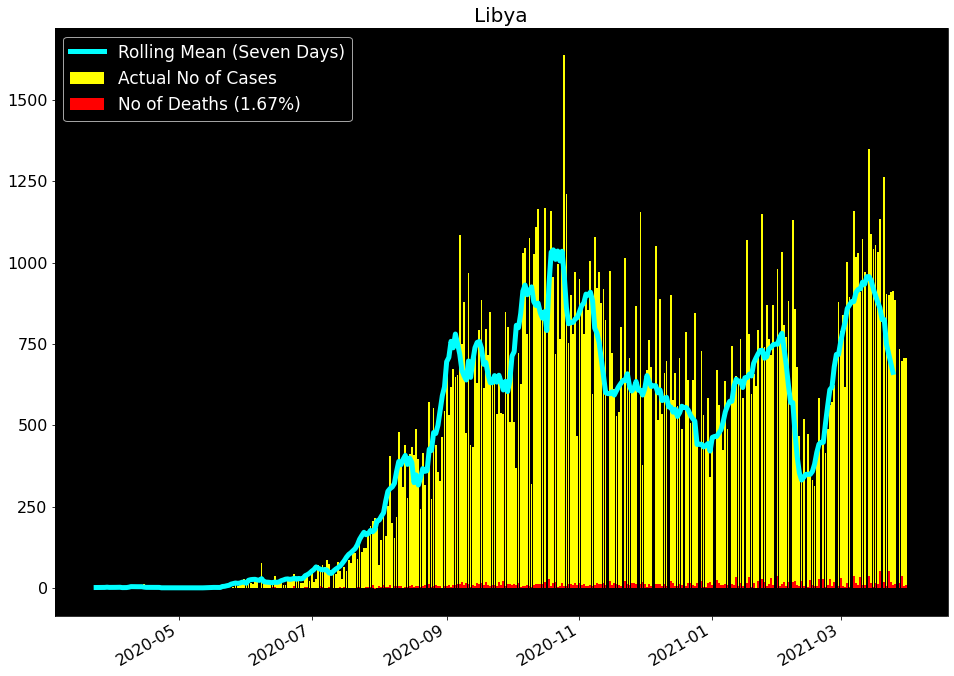

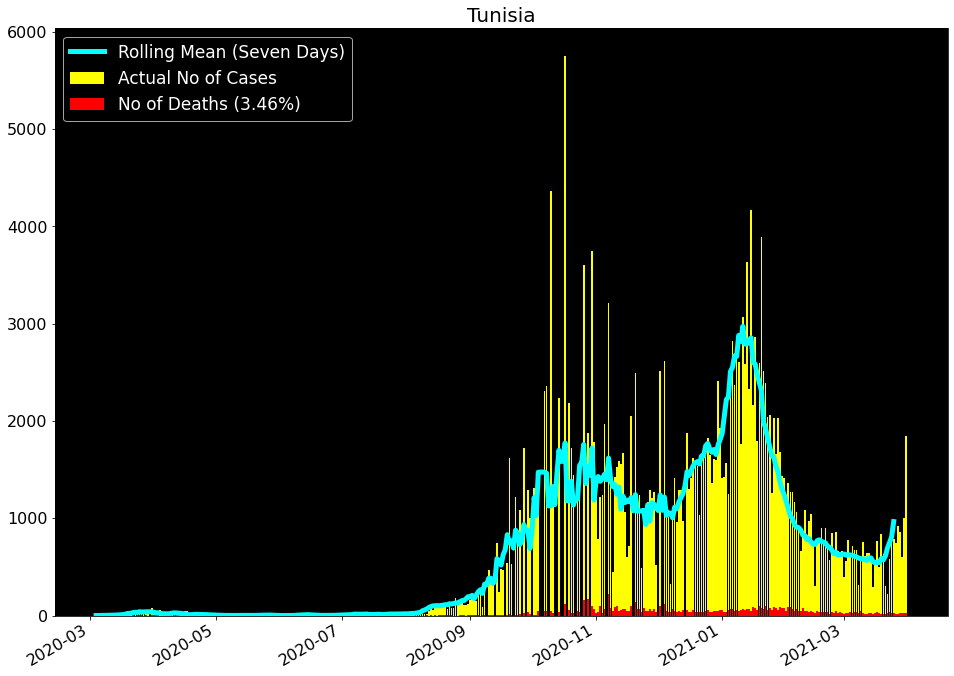

In [ ]:
### Plot configs and customisations
plt.rcParams["figure.figsize"] = (16,12)

font = {'family' : 'DejaVu Sans',
        'size'   : 16}

plt.rc('font', **font)
plt.rc('axes', titlesize=20)
plt.rcParams['axes.facecolor'] = 'lightcyan'
plt.rcParams['axes.facecolor'] = 'black'


ls = ['Libya','Tunisia', 'Algeria', 'Morocco','Egypt']
for country in ls:
    ## retrieve the data for this country
    ## notice reverse the order so that the oldest day is the first
    data = df[df['location'] == country].iloc[::-1]
    ## date formatting after pasring the dateRep from the data
    x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in data['date']]

    y = data['new_cases']
    y1 = y.rolling(7).mean()
    y3 = data['new_deaths']
    # compute % of deaths
    cs = y.sum()
    dth = y3.sum()
    pct = int((dth/cs)*10000)/100
    
    # plot
    plt.bar(x, y,label='Actual No of Cases',color='yellow')
    plt.plot(x, y1, linewidth=5,label='Rolling Mean (Seven Days)', color='cyan')
    plt.bar(x,y3, label='No of Deaths ('+str(pct)+'%)',color='red')

    legend = plt.legend(loc="upper left", prop={'size': 17})
    plt.setp(legend.get_texts(), color='w')
    # beautify the x-labels
    plt.gcf().autofmt_xdate()
    plt.title(country)
    plt.show()

## Thank you!